In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyMELTScalc as M
import sys
sys.path.append(r"H:\My Drive\2022\GitHub\pyMELTScalc\MELTS")

M.__version__

'0.1.9dev'

Use the experimental data from Villiger et al. 2007 to test the possible different crystallization models.

In [2]:
Vill = pd.read_excel("Villiger2007.xlsx")
bulk = Vill.loc[0]

In [3]:
bulk

Sample       HK#19.2 
SiO2_Liq        48.67
TiO2_Liq         0.57
Al2O3_Liq       14.55
Cr2O3_Liq        0.34
FeOt_Liq         7.56
MnO_Liq          0.14
MgO_Liq         14.81
CaO_Liq         11.73
Na2O_Liq          1.5
K2O_Liq          0.08
Name: 0, dtype: object

Start with simple isobaric crystallisation (one model):

In [4]:
Results = M.isobaric_crystallisation(Model = "MELTSv1.0.2", bulk = bulk,
                                     Frac_solid = True, Frac_fluid = True,
                                     T_end_C = 950, dt_C = 2, P_bar = 2000, H2O_Liq = 0.1,
                                     find_liquidus = True, fO2_buffer = "FMQ")

Running MELTSv1.0.2 calculation... Complete (time taken = 47.78 seconds)

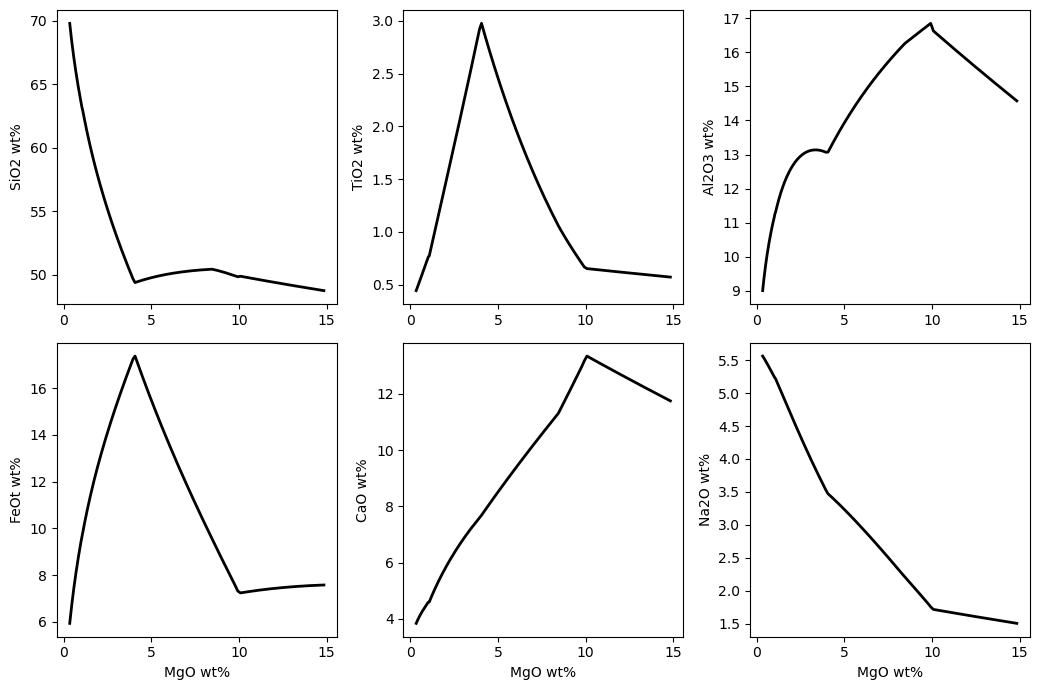

In [5]:
M.harker(Results = Results)

Perform multiple isobaric crystallisation calculations at multiple pressures:

In [6]:
Results = M.isobaric_crystallisation(Model = "MELTSv1.0.2", bulk = bulk,
                                     Frac_solid = True, Frac_fluid = True,
                                     T_end_C = 950, dt_C = 2, 
                                     P_bar = np.linspace(500,10000,10), H2O_Liq = 0.1,
                                     find_liquidus = True, fO2_buffer = "FMQ", label = "P")

  0%|          | 0/2 [00:00<?, ?it/s]

Running MELTSv1.0.2 calculations 0 to 7.0 ... Complete (time taken = 171.88 seconds)
Running MELTSv1.0.2 calculations 8 to 9.0 ... Complete (time taken = 61.77 seconds)
dict_keys(['P = 10000 bars', 'P = 1556 bars', 'P = 2611 bars', 'P = 3667 bars', 'P = 4722 bars', 'P = 500 bars', 'P = 5778 bars', 'P = 6833 bars', 'P = 7889 bars', 'P = 8944 bars'])


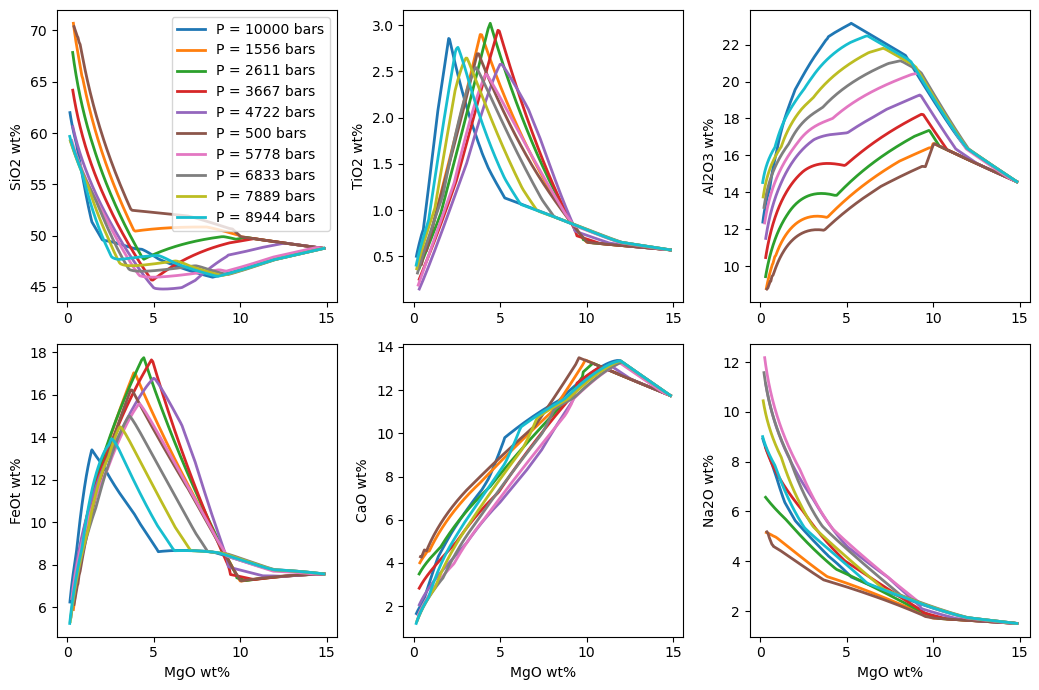

In [7]:
M.harker(Results = Results, label = True)

Perform 1 step polybaric crystallisation

In [8]:
Results = M.polybaric_crystallisation_onestep(Model = "MELTSv1.0.2", bulk = bulk,
                                     Frac_solid = True, Frac_fluid = True,
                                     T_end_C = 950, dt_C = 2, T_step_C = 1180,
                                     P_start_bar = 5000, P_end_bar = 1000, H2O_Liq = 0.1,
                                     find_liquidus = True, fO2_buffer = "FMQ")

Running MELTSv1.0.2 calculation... Complete (time taken = 40.73 seconds)

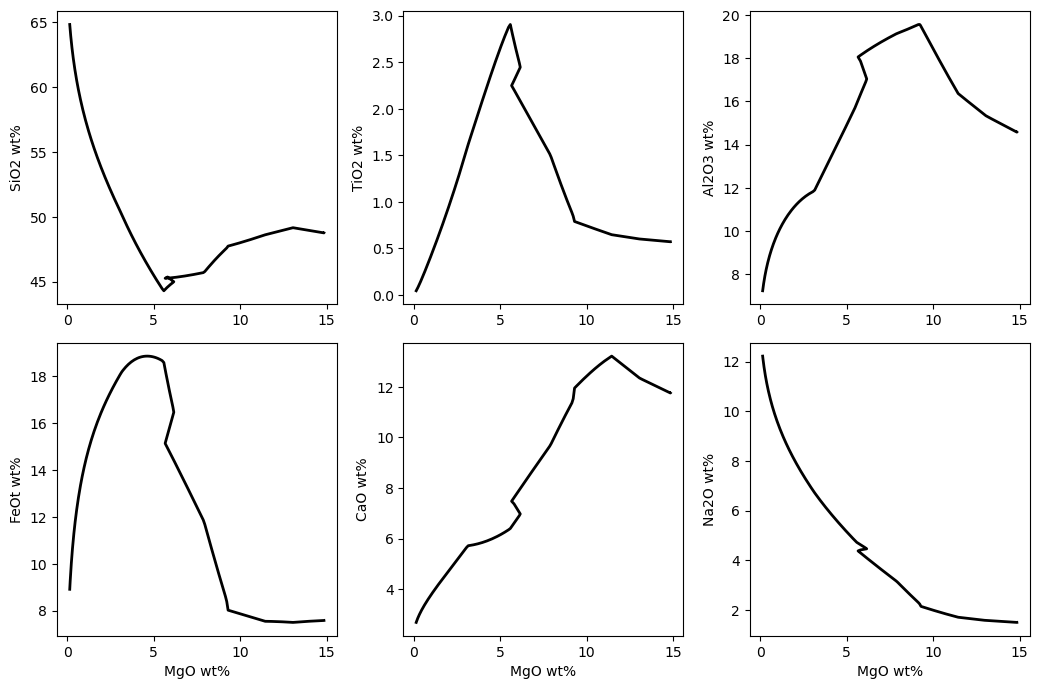

In [9]:
M.harker(Results = Results)

Run multiple polybaric models where the step change in pressure occurs at different temperatures.

In [10]:
Results = M.polybaric_crystallisation_onestep(Model = "MELTSv1.0.2", bulk = bulk,
                                     Frac_solid = True, Frac_fluid = True,
                                     T_end_C = 950, dt_C = 2, T_step_C = np.array([1260,1240,1220,1200,1180,1160,1140,1120]),
                                     P_start_bar = 5000, P_end_bar = 1000, H2O_Liq = 0.1,
                                     find_liquidus = True, fO2_buffer = "FMQ")

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.0.2 calculations 0 to 7.0 ... Complete (time taken = 152.82 seconds)
dict_keys(['index = 1', 'index = 2', 'index = 3', 'index = 6', 'index = 5', 'index = 4', 'index = 7', 'index = 0'])


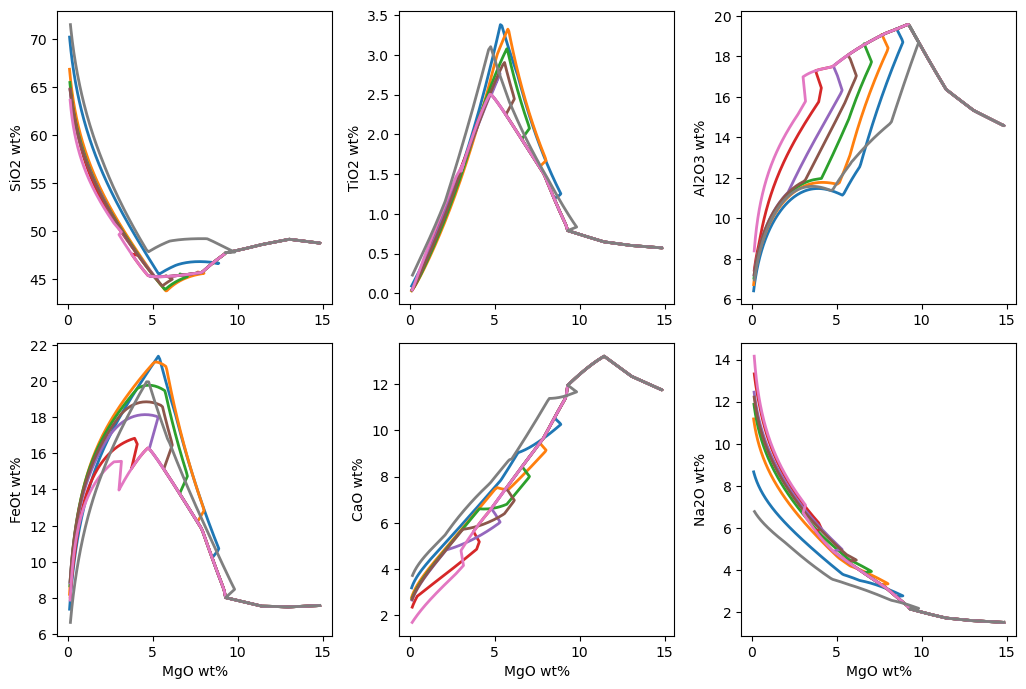

In [11]:
M.harker(Results = Results)

Polybaric crystallisation model with multiple changes in pressure at set temperatures:

In [17]:
Results = M.polybaric_crystallisation_path(Model = "MELTSv1.0.2", bulk = bulk,
                                             Frac_solid = True, Frac_fluid = True,
                                             T_start_C = 1380, T_end_C = 950, dt_C = 2,
                                             P_start_bar = 5000, dp_bar = 20,  
                                             H2O_Liq = 0.1,
                                             find_liquidus = True, fO2_buffer = "FMQ")

Running MELTSv1.0.2 calculation... Complete (time taken = 56.55 seconds)

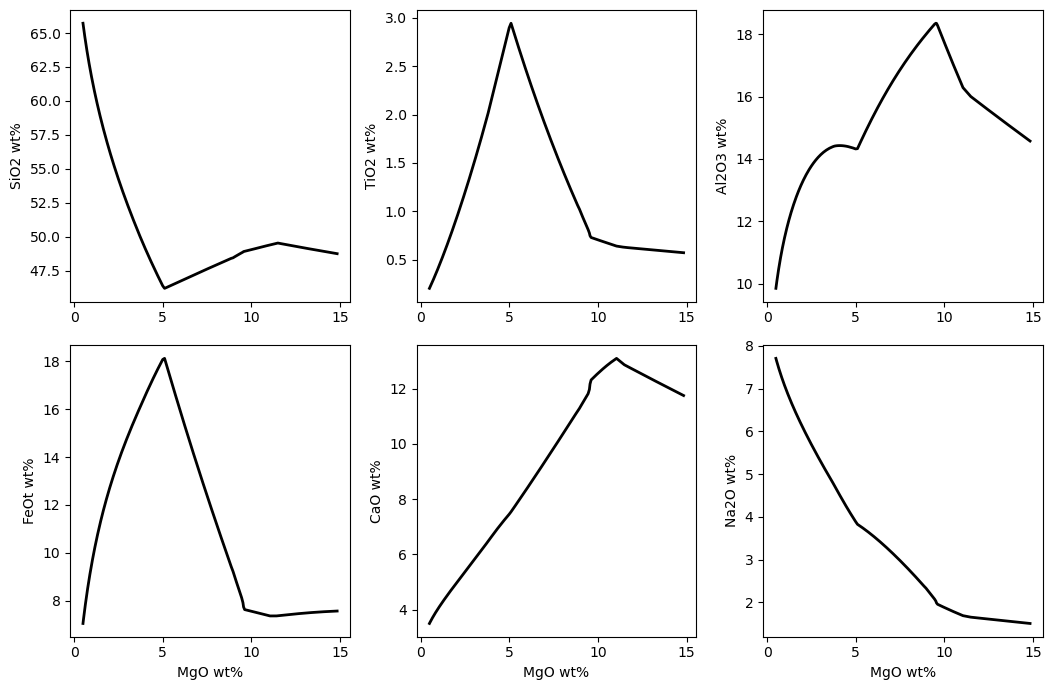

In [18]:
M.harker(Results = Results)

In [19]:
Results = M.polybaric_crystallisation_path(Model = "MELTSv1.0.2", bulk = bulk,
                                             Frac_solid = True, Frac_fluid = True,
                                             T_start_C = 1380, T_end_C = 950, dt_C = 2,
                                             P_start_bar = np.array([5000, 4000, 3000, 2000]), dp_bar = np.array([20, 15, 10, 5]),  
                                             H2O_Liq = 0.1,
                                             find_liquidus = True, fO2_buffer = "FMQ", label = "P")

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.0.2 calculations 0 to 3.0 ... Complete (time taken = 99.43 seconds)
dict_keys(['P = 2000 bars', 'P = 3000 bars', 'P = 4000 bars', 'P = 5000 bars'])


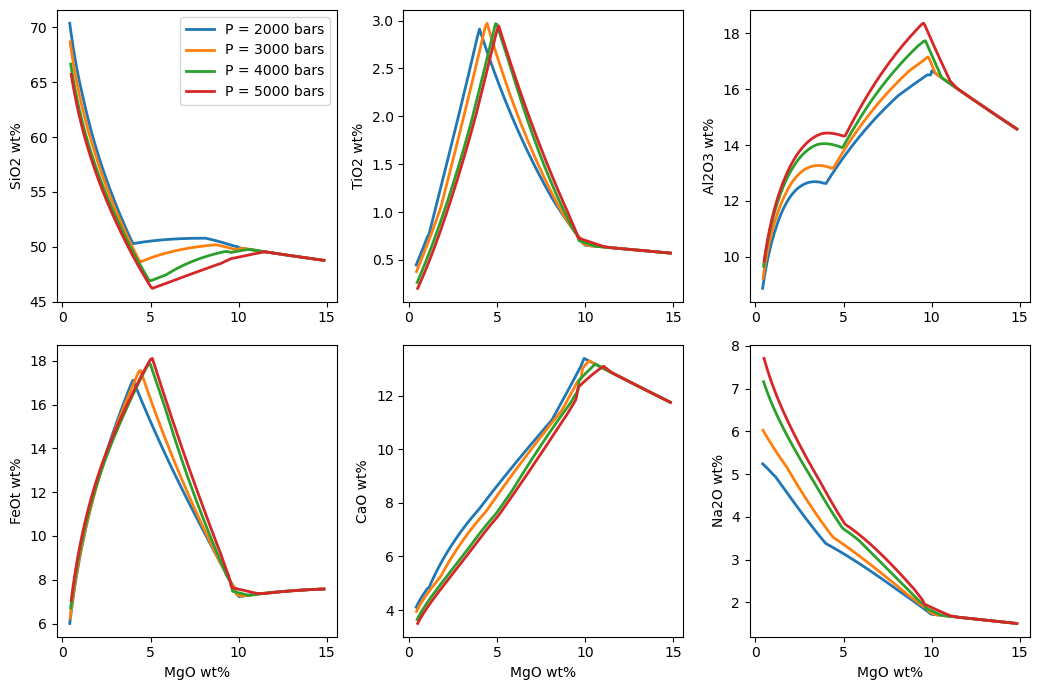

In [20]:
M.harker(Results = Results, label = True)

In [21]:
Results = M.polybaric_crystallisation_path(Model = "MELTSv1.0.2", bulk = bulk,
                                             Frac_solid = True, Frac_fluid = True,
                                             T_start_C = 1380, T_end_C = 950, dt_C = 2,
                                             P_start_bar = np.array([5000, 4000, 3000, 2000]), P_end_bar = 1000,  
                                             H2O_Liq = 0.1,
                                             find_liquidus = True, fO2_buffer = "FMQ", label = "P")

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.0.2 calculations 0 to 3.0 ... Complete (time taken = 94.99 seconds)
dict_keys(['P = 2000 bars', 'P = 3000 bars', 'P = 4000 bars', 'P = 5000 bars'])


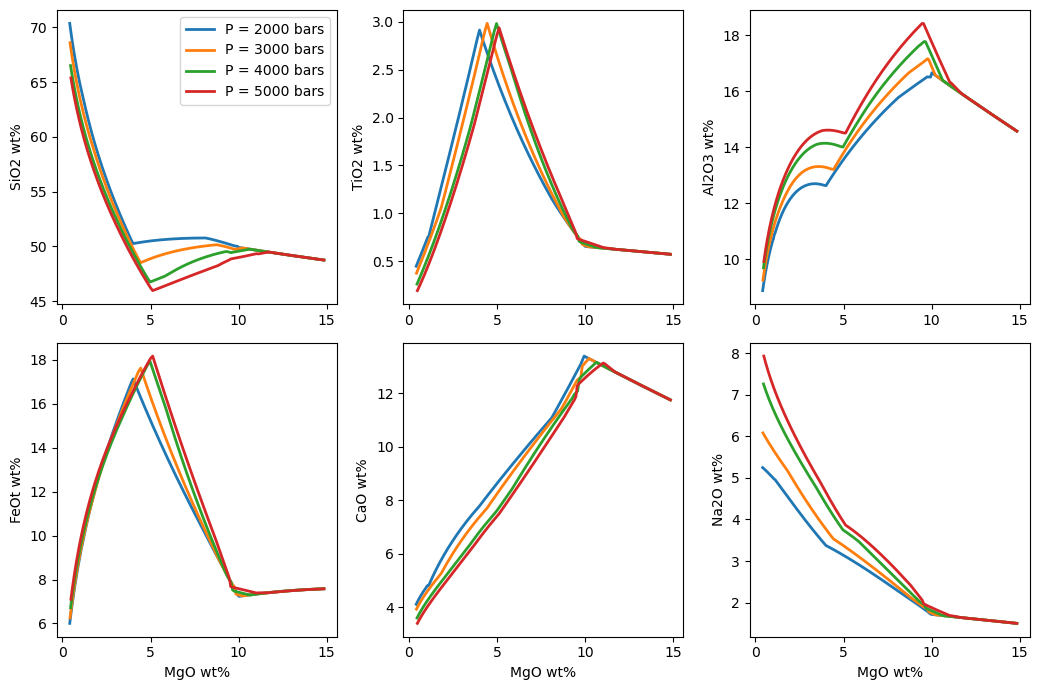

In [22]:
M.harker(Results = Results, label = True)

In [23]:
Results = M.isobaric_crystallisation(Model = "MELTSv1.0.2", bulk = bulk,
                                     Frac_solid = True, Frac_fluid = True,
                                     T_end_C = 950, dt_C = 2, P_bar = 2000, 
                                     H2O_Liq = np.array([0.1, 0.5, 1, 2, 3, 4, 6]),
                                     find_liquidus = True, fO2_buffer = "FMQ", label = "water")

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.0.2 calculations 0 to 6.0 ... Complete (time taken = 255.15 seconds)
dict_keys(['H2O = 0.1 wt%', 'H2O = 0.99 wt%', 'H2O = 1.97 wt%', 'H2O = 2.92 wt%', 'H2O = 3.57 wt%'])


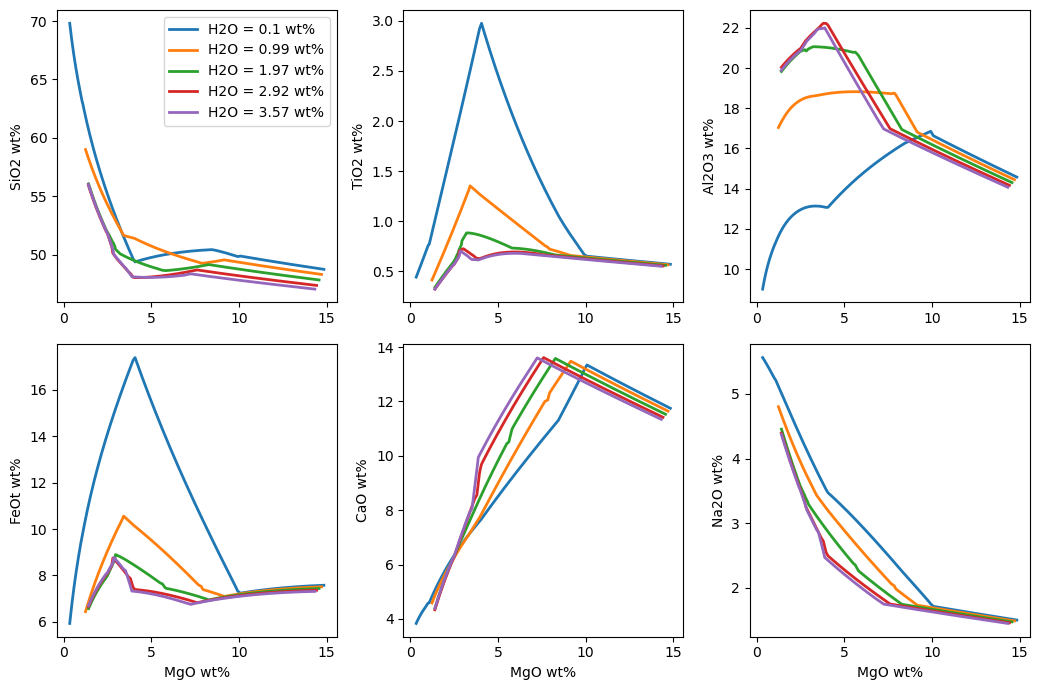

In [24]:
M.harker(Results = Results, label = True)

In [25]:
Results = M.isobaric_crystallisation(Model = "MELTSv1.0.2", bulk = bulk,
                                     Frac_solid = True, Frac_fluid = True,
                                     T_end_C = 950, dt_C = 2, P_bar = 2000, 
                                     H2O_Liq = 0.1, find_liquidus = True, 
                                     fO2_buffer = "FMQ", fO2_offset = np.array([-2, -1, -0.5, 0.0, 0.5, 1, 1.5, 2]),
                                     label = "fO2")

  0%|          | 0/1 [00:00<?, ?it/s]

Running MELTSv1.0.2 calculations 0 to 7.0 ... Complete (time taken = 197.43 seconds)
dict_keys(['FMQ -0.5', 'FMQ -1.0', 'FMQ -2.0', 'FMQ 0.0', 'FMQ 0.5', 'FMQ 1.0', 'FMQ 1.5', 'FMQ 2.0'])


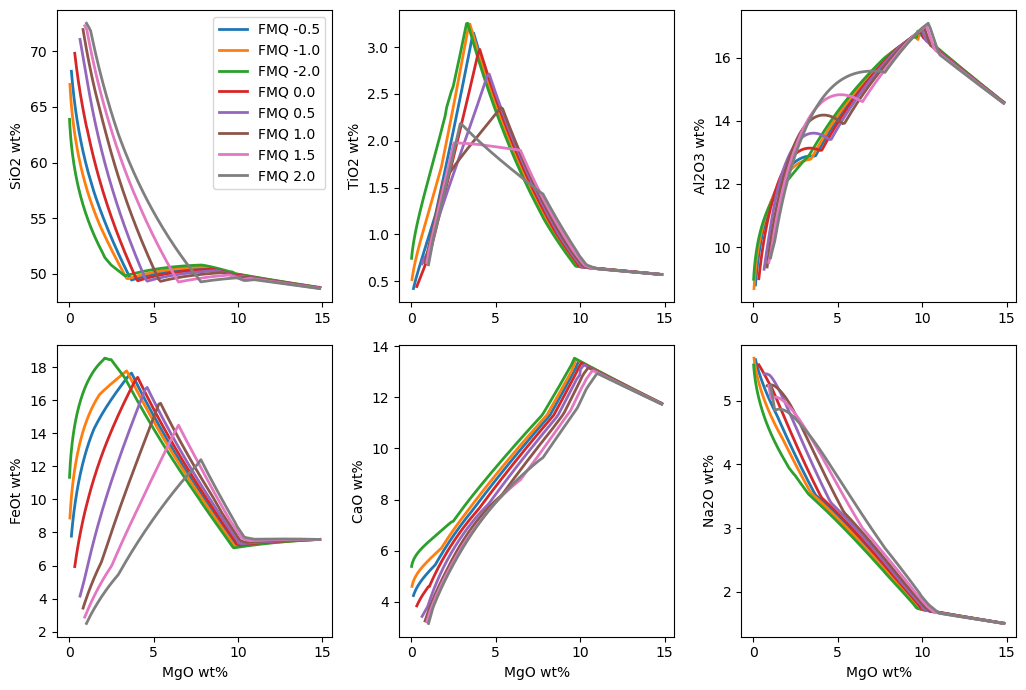

In [26]:
M.harker(Results = Results, label = True)